In [151]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import AffinityPropagation

#plt.style.use('tableau-colorblind10')
sns.set(font_scale=0.8)
%matplotlib widget

In [152]:
#Number of agents
N = 4

## Load data

In [153]:
df = pd.read_table("params/N4/simulation_params_N4C0.5.dat", sep="\s+", header=None, names=['efficiency','inequality','n_efficiency','n_inequality','entropy','cond_entropy','frequency','info_per_agent','int_entropy','ineq_slope','emax_perc'])
df

,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
0,0.480289,0.019307,0.239869,0.009436,0.654398,0.007394,0.200000,1.400,0.998745,-1.312720e-05,0.9960
1,0.461038,0.139851,0.191066,0.057949,0.502600,0.024062,0.333333,2.000,0.992706,4.614952e-06,0.9640
2,0.436895,0.254218,0.135095,0.078587,0.420754,0.049950,0.500000,50.850,0.993744,1.243046e-05,0.9695
3,0.500173,0.000087,0.249957,0.000043,0.250000,0.000000,0.500000,1.000,0.999500,0.000000e+00,1.0000
4,0.499220,0.000481,0.249653,0.000241,0.250000,0.000000,0.500000,1.000,0.999500,-1.622580e-07,1.0000
...,...,...,...,...,...,...,...,...,...,...,...
596,0.443237,0.148506,0.180105,0.057865,0.437883,0.025943,1.000000,0.300,0.994697,-7.421509e-05,0.9810
597,0.482153,0.024696,0.236700,0.011911,0.272982,0.010263,1.000000,0.000,0.996462,4.292518e-06,0.9925
598,0.483448,0.002749,0.247733,0.001410,0.500000,0.000000,0.250000,1.500,0.999500,-8.651922e-07,1.0000
599,0.406939,0.318269,0.137964,0.107864,0.303532,0.091819,0.142857,0.400,0.988054,1.613481e-05,0.9415


In [154]:
df['efficiency'].describe()

count    601.000000
mean       0.447782
std        0.030788
min        0.366872
25%        0.426343
50%        0.456042
75%        0.470086
max        0.500173
Name: efficiency, dtype: float64

In [155]:
#data_f = pd.read_csv("data/MFP_4medidas.csv")
#data_f.head()

In [156]:
#df = data_f[['efficiency','entropy','attendance','inequality']]

In [157]:
#df[(df['efficiency']<201) & (df['inequality']<50) & (df['info_per_agent']<=1)]

In [158]:
#df[(df['efficiency']>201) & (df['inequality']>200) & (df['entropy']<=0.1)]

In [159]:
#Filter out data where all agents choose 0 always or all agents choose 1 always
#df = df[(df['int_entropy']>0)].reset_index()
#df = df[(df['int_entropy']>0) & (df['info_per_agent']<=N)].reset_index()
#df

## Plot data

<Axes: xlabel='efficiency', ylabel='inequality'>

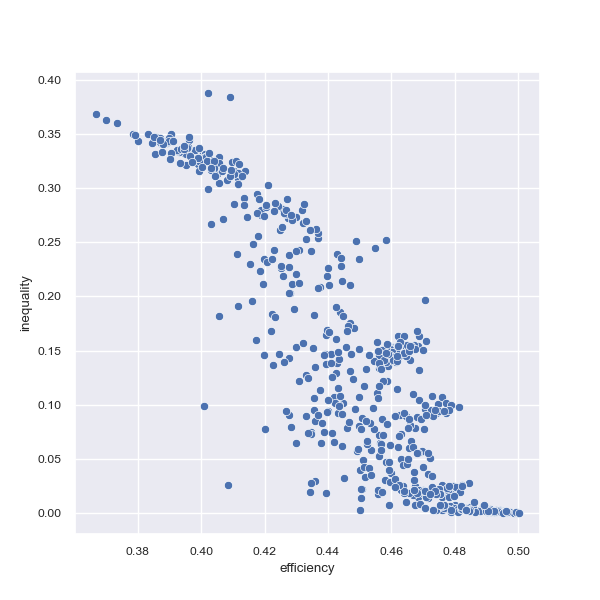

In [160]:
fig0, ax = plt.subplots(figsize=(6,6))
sns.scatterplot(data=df, ax=ax, x='efficiency', y='inequality')

## Standardize data

In [161]:
#df_std = df[['n_efficiency','n_inequality','entropy','info_per_agent']].apply(lambda x: x-np.mean(x))
#df_std = df_std.apply(lambda x: x/np.std(x))
#df_std.head()

In [162]:
#X_dat = df_std.to_numpy()
#X_dat.shape

In [163]:
df_red = df[['n_efficiency','n_inequality','entropy']]
#scaler = MinMaxScaler()
#scaler.fit(df_red)
X_dat = df_red.to_numpy() #scaler.transform(df_red)
X_dat.shape

(601, 3)

# 2D

## t-sne

In [164]:
from sklearn.manifold import TSNE

In [165]:
# Get t-sne embeding with 2 dimensions
tsne = TSNE(n_components=2,learning_rate='auto',perplexity=30,init='random')
tsne_result = tsne.fit_transform(X_dat)
tsne_result.shape

(601, 2)

In [166]:
df_tsne_res = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1]})
df_tsne_res = df_tsne_res.join(df)
df_tsne_res.head()

,tsne_1,tsne_2,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
0,29.221256,4.375140,0.480289,0.019307,0.239869,0.009436,0.654398,0.007394,0.200000,1.40,0.998745,-1.312720e-05,0.9960
1,12.067313,19.540623,0.461038,0.139851,0.191066,0.057949,0.502600,0.024062,0.333333,2.00,0.992706,4.614952e-06,0.9640
2,0.444063,1.856949,0.436895,0.254218,0.135095,0.078587,0.420754,0.049950,0.500000,50.85,0.993744,1.243046e-05,0.9695
3,-35.215797,-21.302557,0.500173,0.000087,0.249957,0.000043,0.250000,0.000000,0.500000,1.00,0.999500,0.000000e+00,1.0000
4,-34.469009,-20.961384,0.499220,0.000481,0.249653,0.000241,0.250000,0.000000,0.500000,1.00,0.999500,-1.622580e-07,1.0000


In [167]:
df_tsne_res[(df_tsne_res['tsne_1']>-100) & (df_tsne_res['tsne_1']<100) & (df_tsne_res['tsne_2']>-100) & (df_tsne_res['tsne_2']<-25)]

,tsne_1,tsne_2,efficiency,inequality,n_efficiency,n_inequality,entropy,cond_entropy,frequency,info_per_agent,int_entropy,ineq_slope,emax_perc
27,5.433370,-26.318748,0.386572,0.345368,0.131796,0.117734,0.195593,0.106459,1.000000,0.500,0.985544,0.000013,0.9325
41,5.251197,-25.157303,0.385658,0.343937,0.131983,0.117680,0.211395,0.106695,1.000000,0.300,0.980733,0.000015,0.9285
101,4.757813,-26.467903,0.387268,0.340443,0.132808,0.116724,0.195070,0.106395,1.000000,0.200,0.985233,0.000015,0.9330
106,1.665766,-26.637627,0.429903,0.152969,0.173888,0.060143,0.170365,0.072529,1.000000,0.250,0.991385,0.000085,0.9570
129,4.920814,-26.203468,0.389366,0.344694,0.132585,0.117359,0.195456,0.104838,0.500000,0.000,0.986667,0.000012,0.9315
131,4.668714,-26.001957,0.388051,0.342261,0.132469,0.116820,0.195456,0.105419,1.000000,0.300,0.986573,0.000013,0.9315
139,4.779214,-25.796797,0.387773,0.340777,0.132973,0.116837,0.198406,0.105751,1.000000,0.600,0.986167,0.000014,0.9315
168,3.038612,-28.172071,0.419942,0.234673,0.151362,0.083804,0.103770,0.103115,1.000000,0.050,0.986827,0.000074,0.9350
170,5.383208,-25.979345,0.384478,0.341565,0.132152,0.117387,0.198887,0.105165,1.000000,0.000,0.985761,0.000014,0.9315
179,2.250261,-25.895628,0.418499,0.223453,0.159327,0.084429,0.200278,0.084425,1.000000,0.200,0.989686,0.000063,0.9480


In [168]:
df_tsne_res['cond_entropy'].describe()

count    601.000000
mean       0.036362
std        0.034575
min        0.000000
25%        0.009216
50%        0.024236
75%        0.059804
max        0.130123
Name: cond_entropy, dtype: float64

Pure segmentation: cond_entropy=0, entropy=0, efficiency=0.5, inequality=max\
Pure alternation: cond_entropy=0, entropy>0, efficiency=0.5, inequality=0


In [169]:
nbins = 20
x = np.linspace(df_tsne_res['efficiency'].min(),df_tsne_res['efficiency'].max(),nbins)
y = np.linspace(df_tsne_res['cond_entropy'].min(),df_tsne_res['cond_entropy'].max(),nbins)
lefce = np.zeros((nbins,nbins))
for i in range(nbins):
    for j in range(nbins):
        df_1 = df_tsne_res[(df_tsne_res['efficiency']>=x[i]) & (df_tsne_res['cond_entropy']>=y[j])]
        lefce[i,j] = df_1.shape[0]/df.shape[0]

Text(0.5, 125.24999999999996, 'cond_entropy')

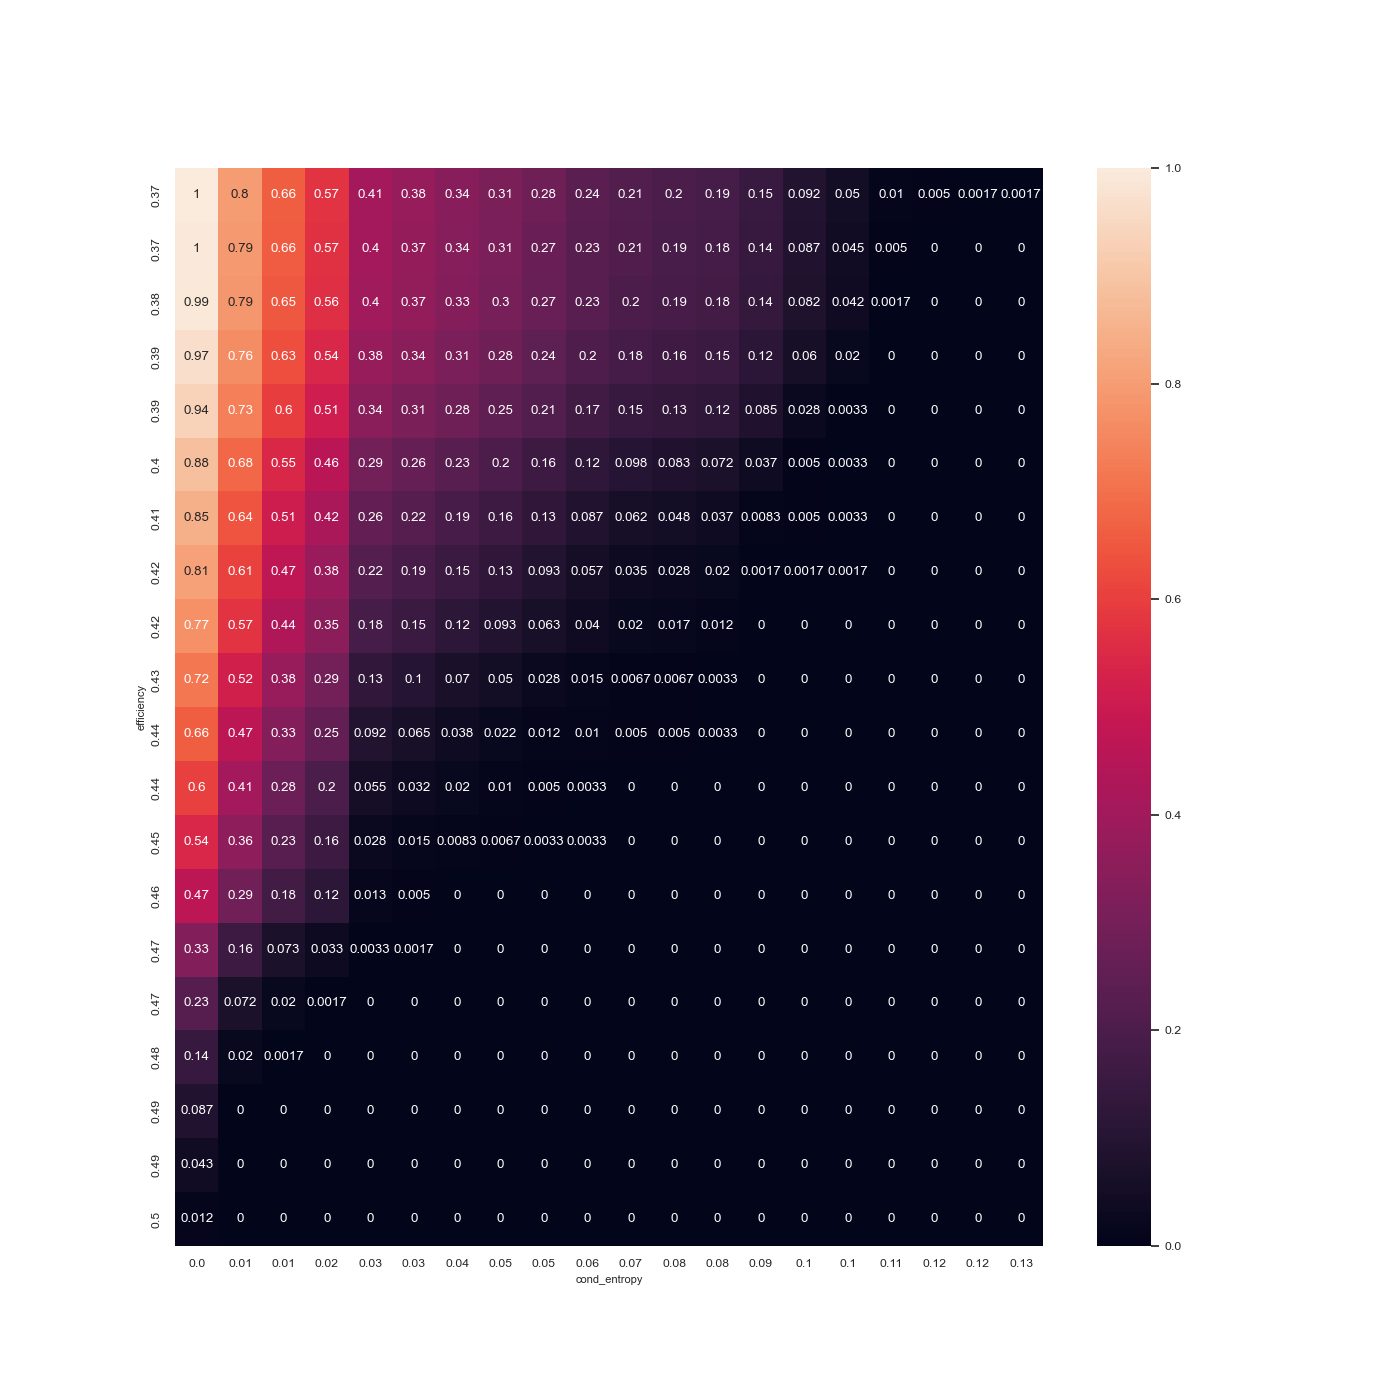

In [170]:
ig0, ax = plt.subplots(figsize=(14,14))
sns.heatmap(lefce, ax=ax, xticklabels=[str(round(i,2)) for i in y],yticklabels=[str(round(i,2)) for i in x], vmin=0,vmax=1,annot=lefce)
ax.set_ylabel('efficiency',fontsize=8)
ax.set_xlabel('cond_entropy',fontsize=8)

In [ ]:
# Percent of segmented simulations
mx = df_tsne_res['inequality'].max()
mn = 0.95*mx
df_seg = df_tsne_res[(df_tsne_res['inequality']>mn) & (df_tsne_res['emax_perc']>0.95)]
df_seg.shape[0]/df.shape[0]

In [ ]:
# Percent of alternating simulations
mx = df_tsne_res['inequality'].max()
mn = 0.05*mx
df_alt = df_tsne_res[(df_tsne_res['inequality']<mn) & (df_tsne_res['emax_perc']>0.95)]
df_alt.shape[0]/df.shape[0]

In [ ]:
##Clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_max = 0
max_silh = -1.e6
for n_clusters in range(2,21):
    kmeans = KMeans(
        n_clusters=n_clusters, 
        random_state=0, 
        n_init='auto'
    ).fit(X_dat)

    silhouette_avg = silhouette_score(X_dat, kmeans.labels_)
    if silhouette_avg > max_silh:
        max_silh = silhouette_avg
        n_max = n_clusters
    print(n_clusters, silhouette_avg)

In [ ]:
#from sklearn.datasets import make_blobs

## Generate synthetic data for demonstration
## Replace this with your actual dataset (X)
#X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Function to compute inertia for different numbers of clusters
def plot_elbow(X, max_clusters=10):
    inertia = []
    cluster_range = range(1, max_clusters + 1)

    # Compute K-Means for different cluster counts
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)

    # Plot the elbow plot
    plt.figure(figsize=(8, 5))
    plt.plot(cluster_range, inertia, marker='o', linestyle='--')
    plt.title('Elbow Plot for Optimal Clusters')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(cluster_range)
    plt.grid()
    plt.show()

# Call the function to plot the elbow
plot_elbow(X_dat, max_clusters=10)

In [ ]:
kmeans = KMeans(
        n_clusters=4, 
        random_state=0, 
        n_init='auto'
    ).fit(X_dat)

df_tsne_res['kmeans'] = kmeans.labels_

In [ ]:
df_tsne_res.to_csv("tsne_params.csv",index=False)

## Plot results

In [ ]:
lab1 = 'efficiency'
lab2 = 'cond_entropy'
lab3 = 'inequality'
lab4 = 'kmeans'

In [ ]:
#idx = 449
#point = [df_tsne_res['tsne_1'][idx], df_tsne_res['tsne_2'][idx]]
#point

In [ ]:
#2D plots
fig1, axis = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

ax1 = sns.scatterplot(data=df_tsne_res, ax=axis[0][0], x='tsne_1', y='tsne_2', hue=lab1, palette='viridis',s=5)
norm1 = plt.Normalize(df_tsne_res[lab1].min(), df_tsne_res[lab1].max())
sm1 = plt.cm.ScalarMappable(cmap="viridis", norm=norm1)
sm1.set_array([])
ax1.get_legend().remove()
cb1 = plt.colorbar(mappable=sm1, ax=ax1)
cb1.set_label(lab1)

ax2 = sns.scatterplot(data=df_tsne_res, ax=axis[0][1], x='tsne_1', y='tsne_2', hue=lab2, palette='viridis',s=5)
norm2 = plt.Normalize(df_tsne_res[lab2].min(), df_tsne_res[lab2].max())
sm2 = plt.cm.ScalarMappable(cmap="viridis", norm=norm2)
sm2.set_array([])
ax2.get_legend().remove()
cb2 = plt.colorbar(mappable=sm2, ax=ax2)
cb2.set_label(lab2)

ax3 = sns.scatterplot(data=df_tsne_res, ax=axis[1][0], x='tsne_1', y='tsne_2', hue=lab3, palette='viridis',s=5)
norm3 = plt.Normalize(df_tsne_res[lab3].min(), df_tsne_res[lab3].max())
sm3 = plt.cm.ScalarMappable(cmap="viridis", norm=norm3)
sm3.set_array([])
ax3.get_legend().remove()
cb3 = plt.colorbar(mappable=sm3, ax=ax3)
cb3.set_label(lab3)

ax4 = sns.scatterplot(data=df_tsne_res, ax=axis[1][1], x='tsne_1', y='tsne_2', hue=lab4, palette='colorblind',s=5)
#sns.scatterplot(ax=axis[1][1], x=np.array([point[0]]), y=np.array([point[1]]), marker='x',color='b',s=100)
norm4 = plt.Normalize(df_tsne_res[lab4].min(), df_tsne_res[lab4].max())
sm4 = plt.cm.ScalarMappable(cmap="Paired", norm=norm4)
sm4.set_array([])
ax4.get_legend().remove()
cb4 = plt.colorbar(mappable=sm4, ax=ax4)
cb4.set_label(lab4)

plt.tight_layout()

In [ ]:
#df_tsne_res[df_tsne_res['kmeans']==0]

# 3D

## t-sne

In [ ]:
# # Get t-sne embeding with 3 dimensions
# tsne3 = TSNE(3,perplexity=30,random_state=123)
# tsne_result3 = tsne3.fit_transform(X_dat)
# tsne_result3.shape

In [ ]:
# df_tsne_res3 = pd.DataFrame({'tsne_1': tsne_result3[:,0], 'tsne_2': tsne_result3[:,1], 'tsne_3': tsne_result3[:,2]})
# df_tsne_res3 = df_tsne_res3.join(df)
# df_tsne_res3.head()

## Plot results

In [ ]:
# #3D plots

# fig = plt.figure(figsize=(14,14))
# ax1 = fig.add_subplot(2,2,1,projection='3d')
# fig.add_axes(ax1)
# sc1 = ax1.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab1], cmap='viridis')#, vmin=-200, vmax=200)
# ax1.set_xlabel('tsne_1')
# ax1.set_ylabel('tsne_2')
# ax1.set_zlabel('tsne_3')
# cbar1 = plt.colorbar(sc1)
# cbar1.set_label(lab1)

# ax2 = fig.add_subplot(2,2,2,projection='3d')
# fig.add_axes(ax2)
# sc2 = ax2.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab2], cmap='viridis')
# ax2.set_xlabel('tsne_1')
# ax2.set_ylabel('tsne_2')
# ax2.set_zlabel('tsne_3')
# cbar2 = plt.colorbar(sc2)
# cbar2.set_label(lab2)

# ax3 = fig.add_subplot(2,2,3,projection='3d')
# fig.add_axes(ax3)
# sc3 = ax3.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab3], cmap='viridis')
# ax3.set_xlabel('tsne_1')
# ax3.set_ylabel('tsne_2')
# ax3.set_zlabel('tsne_3')
# cbar3 = plt.colorbar(sc3)
# cbar3.set_label(lab3)

# ax4 = fig.add_subplot(2,2,4,projection='3d')
# fig.add_axes(ax4)
# sc4 = ax4.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=df_tsne_res3[lab4], cmap='viridis')
# ax4.set_xlabel('tsne_1')
# ax4.set_ylabel('tsne_2')
# ax4.set_zlabel('tsne_3')
# cbar4 = plt.colorbar(sc4)
# cbar4.set_label(lab4)



# #plt.show()

In [ ]:
#af = AffinityPropagation(damping=0.8,max_iter=3000,preference=-3, random_state=0).fit(X_dat)
#cluster_centers_indices = af.cluster_centers_indices_
#labels = af.labels_
#n_clusters = len(cluster_centers_indices)
#n_clusters, len(np.unique(labels))

In [ ]:
##3D plot clustering
#lab = 'labels'

#fig0 = plt.figure(figsize=(8,8))
#ax = Axes3D(fig0)
#fig0.add_axes(ax)

#sc = ax.scatter(df_tsne_res3.tsne_1,df_tsne_res3.tsne_2,df_tsne_res3.tsne_3, c=labels, cmap='Paired')#cmap='tab20')
#ax.set_xlabel('tsne_1')
#ax.set_ylabel('tsne_2')
#ax.set_zlabel('tsne_3')
#cbar = plt.colorbar(sc)
#cbar.set_label(lab)

##plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.datasets import make_classification

# # Generate synthetic data for demonstration
# # Replace this with your actual dataset
# X, y = make_classification(
#    n_samples=1000,
#    n_features=5,
#    n_informative=3,
#    n_classes=3,
#    n_clusters_per_class=1,
#    random_state=42
# )

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_dat, kmeans.labels_, test_size=0.3, random_state=42)

# Initialize the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

In [ ]:
model.coef_